In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import re
twitter_data = pd.read_excel('/content/drive/MyDrive/Text Analytics group project/Twitter_Reviews.xlsx')

In [ ]:
import nltk
from nltk.probability import FreqDist
nltk.download('all')

##Data Preprocessing

In [4]:
twitter_data.columns

Index(['Unnamed: 0', 'Company_Name', 'Rating', 'Date', 'Pros', 'Cons'], dtype='object')

In [5]:
twitter_data["Pros"][139]

'Little at this point but some good and hard working people left from pre-acquisition who strive to maintain a supportive and inclusive environment'

In [6]:
pattern = r"\d+\xa0people found this review helpful.*"
twitter_data["Cons"] = twitter_data["Cons"].replace(pattern, "", regex=True)

In [7]:
pattern = r"Be the first to find this review helpful.*"
twitter_data["Cons"] = twitter_data["Cons"].replace(pattern, "", regex=True)

In [8]:
pattern = r"Be the first to find this review helpful.*"
twitter_data["Cons"] = twitter_data["Cons"].replace(pattern, "", regex=True)

In [9]:
pattern = r"\d+\xa0person found this review helpfulHelpful.*"
twitter_data["Cons"] = twitter_data["Cons"].replace(pattern, "", regex=True)

In [10]:
pattern = r"\d+\xa0people found this review helpfulHelpful.*"
twitter_data["Cons"] = twitter_data["Cons"].replace(pattern, "", regex=True)

In [11]:
twitter_data['Pros'] = twitter_data['Pros'].apply(str)
twitter_data['Cons'] = twitter_data['Cons'].apply(str)

In [12]:
twitter_data['Date'] = pd.to_datetime(twitter_data['Date'])

In [13]:
twitter_data['Cons'] = twitter_data['Cons'].str.lower()
twitter_data['Pros'] = twitter_data['Pros'].str.lower()

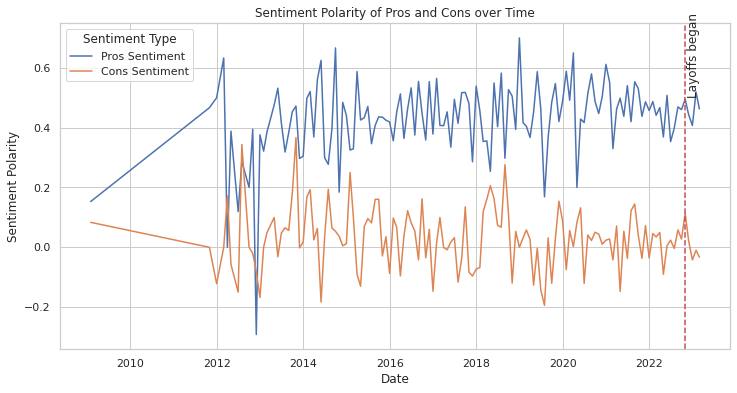

In [14]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
twitter_data['Pros Sentiment'] = twitter_data['Pros'].apply(lambda x: TextBlob(x).sentiment.polarity)
twitter_data['Cons Sentiment'] = twitter_data['Cons'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_monthly = twitter_data.resample('M', on='Date').mean().reset_index()

# Melt the dataframe to plot the sentiment polarity
df_melted = pd.melt(twitter_data, id_vars=['Company_Name', 'Rating', 'Date'], value_vars=['Pros Sentiment', 'Cons Sentiment'],
                    var_name='Sentiment Type', value_name='Sentiment Polarity')

# Melt the dataframe to plot the sentiment polarity
df_melted = pd.melt(df_monthly, id_vars=['Date'], value_vars=['Pros Sentiment', 'Cons Sentiment'],
                    var_name='Sentiment Type', value_name='Sentiment Polarity')

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the sentiment polarity over time
sns.set(style='whitegrid')
sns.lineplot(data=df_melted, x='Date', y='Sentiment Polarity', hue='Sentiment Type')

# Add vertical line for layoffs
plt.axvline(pd.Timestamp('2022-11-01'), color='r', linestyle='--')
plt.text(pd.Timestamp('2022-11-15'), 0.5, 'Layoffs began', rotation=90, verticalalignment='bottom')

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Sentiment Polarity')

# Set the title of the plot
plt.title('Sentiment Polarity of Pros and Cons over Time')

# Show the plot
plt.show()

In [16]:
twitter_data["Review"] =   twitter_data['Pros'] + "." + twitter_data['Cons']

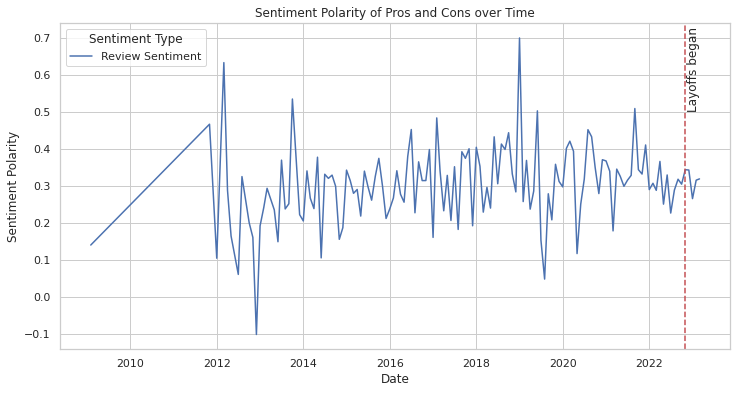

In [17]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
twitter_data['Review Sentiment'] = twitter_data['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_monthly = twitter_data.resample('M', on='Date').mean().reset_index()

# Melt the dataframe to plot the sentiment polarity
df_melted = pd.melt(twitter_data, id_vars=['Company_Name', 'Rating', 'Date'], value_vars=['Review Sentiment'],
                    var_name='Sentiment Type', value_name='Sentiment Polarity')

# Melt the dataframe to plot the sentiment polarity
df_melted = pd.melt(df_monthly, id_vars=['Date'], value_vars=['Review Sentiment'],
                    var_name='Sentiment Type', value_name='Sentiment Polarity')

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the sentiment polarity over time
sns.set(style='whitegrid')
sns.lineplot(data=df_melted, x='Date', y='Sentiment Polarity', hue='Sentiment Type')

# Add vertical line for layoffs
plt.axvline(pd.Timestamp('2022-11-01'), color='r', linestyle='--')
plt.text(pd.Timestamp('2022-11-15'), 0.5, 'Layoffs began', rotation=90, verticalalignment='bottom')

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Sentiment Polarity')

# Set the title of the plot
plt.title('Sentiment Polarity of Pros and Cons over Time')

# Show the plot
plt.show()

In [18]:
from textblob import TextBlob

def get_positive_words(text):
    """
    Returns a list of positive words and phrases from the given text.
    """
    # Create a TextBlob object for the text
    blob = TextBlob(text)
    
    # Get the list of words and phrases
    words = blob.words + blob.noun_phrases
    
    # Initialize a flag to track negation
    negation = False
    
    # Initialize an empty list to store positive words and phrases
    positive_words = []
    
    # Loop through each word in the text
    for word in words:
        # If the word is a negation word, set the negation flag
        if word in ["not", "n't", "never"]:
            negation = True
        
        # If the word is not a negation word and has positive polarity, add it to the list of positive words
        elif TextBlob(word).sentiment.polarity > 0:
            # If the negation flag is set, flip the polarity of the word and add it to the list of positive words
            if negation:
                positive_words.append("not " + word)
                negation = False
            else:
                positive_words.append(word)
        
        # If the word is not a negation word and has negative polarity, reset the negation flag
        elif TextBlob(word).sentiment.polarity < 0:
            negation = False
    
    return positive_words

In [19]:
positive_words = twitter_data["Pros"].apply(get_positive_words)

In [21]:
flat_list = [word for sublist in positive_words for word in sublist]

In [22]:
from collections import Counter
word_counts = Counter(flat_list)
top_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200])
print(top_words)

{'great': 821, 'good': 459, 'very': 179, 'smart': 175, 'amazing': 172, 'free': 126, 'really': 121, 'nice': 120, 'fun': 88, 'best': 87, 'interesting': 80, 'great culture': 74, 'awesome': 71, 'friendly': 70, 'new': 66, 'great people': 64, 'smart people': 64, 'great benefits': 63, 'most': 61, 'love': 51, 'more': 51, 'many': 49, 'free food': 45, 'strong': 43, 'high': 42, 'great place': 39, 'talented': 39, 'excellent': 37, 'exciting': 34, 'cool': 32, 'great perks': 32, 'easy': 31, 'supportive': 31, 'good benefits': 31, 'fast': 30, 'challenging': 30, 'fantastic': 30, 'much': 29, 'decent': 28, 'first': 27, 'nice people': 27, 'incredible': 26, 'top': 26, 'good culture': 25, 'super': 25, 'great food': 25, 'kind': 24, 'intelligent': 24, 'huge': 24, 'pretty': 23, 'great company': 23, 'positive': 22, 'better': 22, 'right': 22, 'good food': 21, 'good work life balance': 21, 'good perks': 20, 'full': 19, 'generally': 19, 'happy': 18, 'willing': 17, 'interesting work': 17, 'highly': 17, 'own': 17, 'g

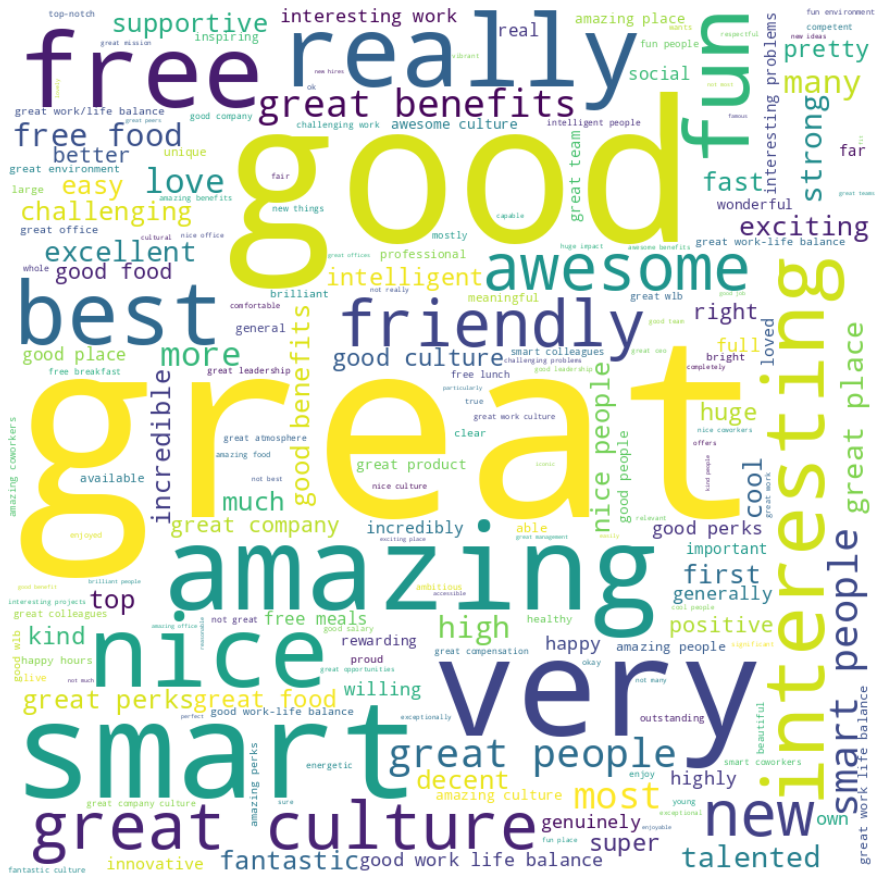

In [23]:
from wordcloud import WordCloud

# Create a WordCloud object with the specified parameters
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_words)

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
import requests
from PIL import Image
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator

# Download the image from the internet
image_url = 'https://cdn.vectorstock.com/i/1000x1000/55/83/thumb-up-symbol-like-icon-flat-style-vector-22855583.webp'
response = requests.get(image_url, stream=True)
img = Image.open(response.raw)

# Convert the image to a numpy array
img_array = np.array(img)

# Create a word cloud
wc = WordCloud(background_color='white', max_words=2000, mask=img_array)

# Generate word cloud from the dictionary
wc.generate_from_frequencies(top_words)

# Create color from image
image_colors = ImageColorGenerator(img_array)

# Plot the word cloud with the image as the background
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()

NameError: ignored

In [24]:
from textblob import TextBlob

def get_negative_words(text):
    """
    Returns a list of negative words and phrases from the given text.
    """
    # Create a TextBlob object for the text
    blob = TextBlob(text)
    
    # Get the list of words and phrases
    words = blob.words + blob.noun_phrases
    
    # Initialize a flag to track negation
    negation = False
    
    # Initialize an empty list to store negative words and phrases
    negative_words = []
    
    # Loop through each word in the text
    for word in words:
        # If the word is a negation word, set the negation flag
        if word in ["not", "n't", "never"]:
            negation = True
        
        # If the word is not a negation word and has negative polarity, add it to the list of negative words
        elif TextBlob(word).sentiment.polarity < 0:
            # If the negation flag is set, flip the polarity of the word and add it to the list of negative words
            if negation:
                negative_words.append("not " + word)
                negation = False
            else:
                negative_words.append(word)
        
        # If the word is not a negation word and has positive polarity, reset the negation flag
        elif TextBlob(word).sentiment.polarity > 0:
            negation = False
    
    return negative_words


In [25]:
negative_words = twitter_data["Cons"].apply(get_negative_words)

In [26]:
flat_list = [word for sublist in negative_words for word in sublist]
from collections import Counter
word_counts = Counter(flat_list)
top_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200])
print(top_words)

{'slow': 83, 'hard': 82, 'other': 73, 'little': 62, 'poor': 60, 'long': 59, 'bad': 58, 'difficult': 41, 'due': 38, 'down': 34, 'few': 30, 'limited': 22, 'less': 22, 'terrible': 21, 'extremely': 20, 'small': 18, 'remote': 17, 'weak': 17, 'tough': 16, 'inexperienced': 15, 'poor leadership': 13, 'negative': 13, 'past': 13, 'behind': 12, 'mess': 12, 'long hours': 12, 'horrible': 11, 'slowly': 11, 'unfortunately': 10, 'worst': 10, 'frustrating': 10, 'expected': 10, 'mediocre': 9, 'harder': 9, 'not other': 9, 'heavy': 8, 'outdated': 7, 'impossible': 7, 'worse': 7, 'mean': 7, 'poorly': 7, 'slightly': 7, 'common': 7, 'incompetent': 6, 'single': 6, 'unpredictable': 6, 'not bad': 6, 'poor management': 6, 'expensive': 6, 'late': 6, 'remote offices': 6, 'crazy': 5, 'wrong': 5, 'usually': 5, 'complicated': 5, 'passionate': 5, 'fail': 5, 'not hard': 5, 'minor': 5, 'bad management': 5, 'unable': 5, 'least': 5, 'rough': 5, 'not down': 4, 'everyday': 4, 'not few': 4, 'previous': 4, 'unfair': 4, 'excess

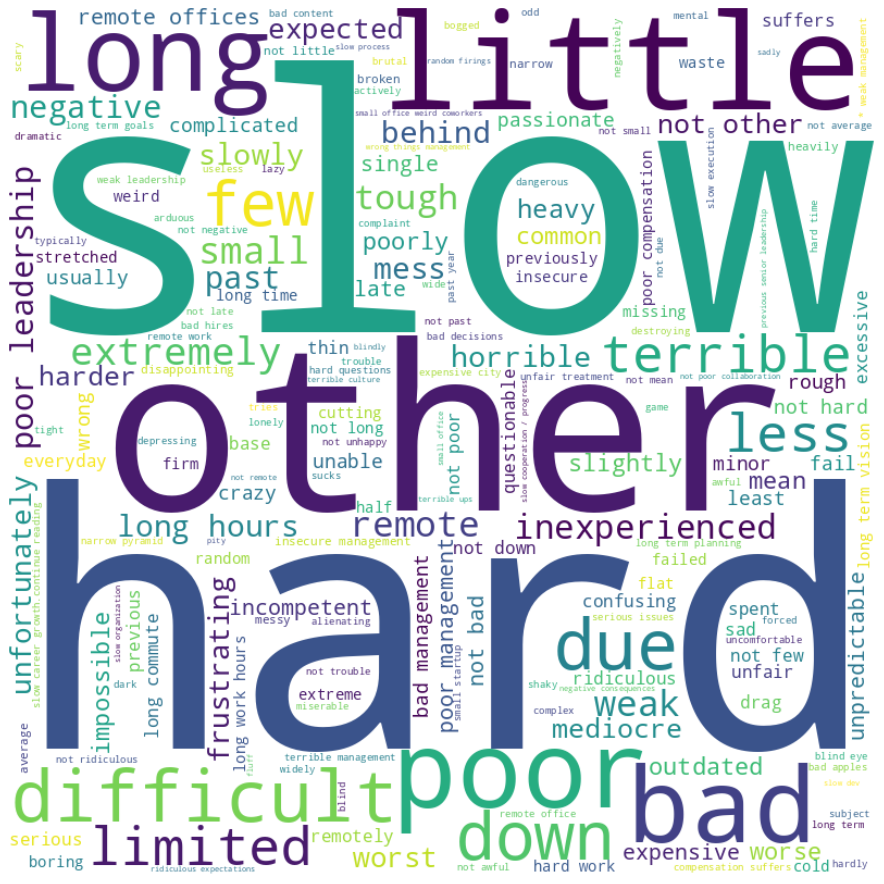

In [27]:
from wordcloud import WordCloud

# Create a WordCloud object with the specified parameters
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_words)

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##Filtering pre and post layoffs


In [28]:
twitter_data["Date"] = pd.to_datetime(twitter_data["Date"])

In [29]:
twitter_data_post_layoff =   twitter_data[twitter_data["Date"] >= "2022-11-30"]

In [30]:
twitter_data_pre_layoff =   twitter_data[twitter_data["Date"] <= "2022-11-01"]

In [31]:
len(twitter_data_pre_layoff)

1391

##Pros (Positive comments) before lay-offs

In [35]:
positive_words = twitter_data_pre_layoff["Pros"].apply(get_positive_words)

In [36]:
flat_list = [word for sublist in positive_words for word in sublist]

In [37]:
from collections import Counter
word_counts = Counter(flat_list)
top_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200])
print(top_words)

{'great': 712, 'good': 392, 'very': 165, 'smart': 160, 'amazing': 142, 'free': 122, 'really': 111, 'nice': 105, 'fun': 79, 'best': 73, 'interesting': 70, 'friendly': 66, 'awesome': 64, 'great culture': 64, 'smart people': 60, 'great people': 57, 'new': 55, 'love': 50, 'most': 50, 'great benefits': 49, 'more': 47, 'many': 46, 'free food': 43, 'high': 40, 'strong': 38, 'talented': 35, 'excellent': 33, 'exciting': 31, 'easy': 30, 'cool': 29, 'great perks': 29, 'much': 27, 'good benefits': 27, 'great place': 27, 'decent': 26, 'top': 26, 'fast': 25, 'nice people': 25, 'challenging': 25, 'great food': 25, 'incredible': 24, 'fantastic': 24, 'super': 23, 'pretty': 22, 'better': 22, 'first': 22, 'huge': 22, 'right': 22, 'positive': 21, 'good food': 20, 'intelligent': 20, 'great company': 20, 'good culture': 19, 'generally': 19, 'good perks': 19, 'supportive': 19, 'kind': 18, 'good work life balance': 18, 'full': 17, 'genuinely': 17, 'happy': 17, 'social': 16, 'own': 16, 'willing': 15, 'interest

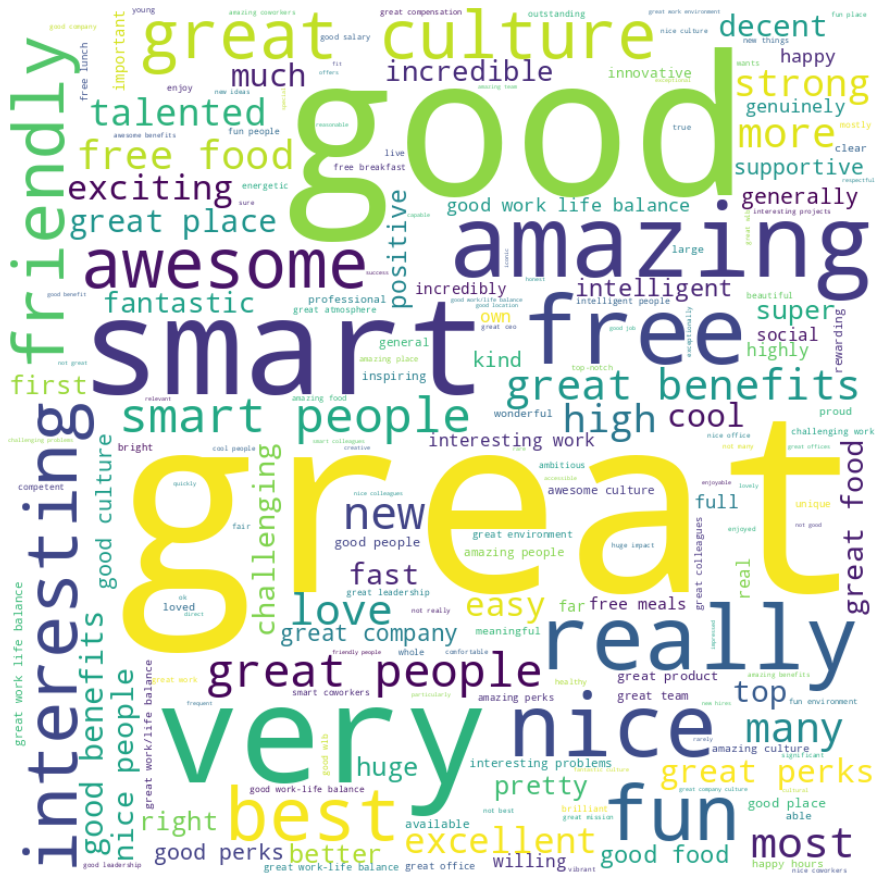

In [38]:
from wordcloud import WordCloud

# Create a WordCloud object with the specified parameters
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_words)

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Negative comments pre lay-*offs*

In [39]:
negative_words = twitter_data_pre_layoff["Cons"].apply(get_negative_words)

In [40]:
flat_list = [word for sublist in negative_words for word in sublist]
from collections import Counter
word_counts = Counter(flat_list)
top_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200])
print(top_words)

{'hard': 75, 'other': 70, 'slow': 66, 'little': 59, 'poor': 51, 'bad': 50, 'long': 50, 'difficult': 41, 'due': 37, 'down': 30, 'few': 30, 'limited': 22, 'less': 18, 'small': 17, 'weak': 17, 'tough': 16, 'extremely': 15, 'terrible': 15, 'remote': 15, 'inexperienced': 15, 'past': 12, 'behind': 11, 'negative': 11, 'mess': 11, 'slowly': 11, 'worst': 10, 'frustrating': 10, 'expected': 10, 'poor leadership': 9, 'long hours': 9, 'mediocre': 9, 'harder': 9, 'not other': 9, 'outdated': 7, 'impossible': 7, 'mean': 7, 'poorly': 7, 'slightly': 7, 'horrible': 7, 'common': 7, 'expensive': 6, 'late': 6, 'remote offices': 6, 'crazy': 5, 'minor': 5, 'bad management': 5, 'unable': 5, 'least': 5, 'rough': 5, 'not bad': 5, 'poor management': 5, 'unfortunately': 4, 'wrong': 4, 'thin': 4, 'heavy': 4, 'worse': 4, 'incompetent': 4, 'serious': 4, 'questionable': 4, 'not hard': 4, 'suffers': 4, 'confusing': 4, 'remotely': 4, 'ridiculous': 4, 'complicated': 4, 'drag': 4, 'fail': 4, 'long commute': 4, 'usually': 

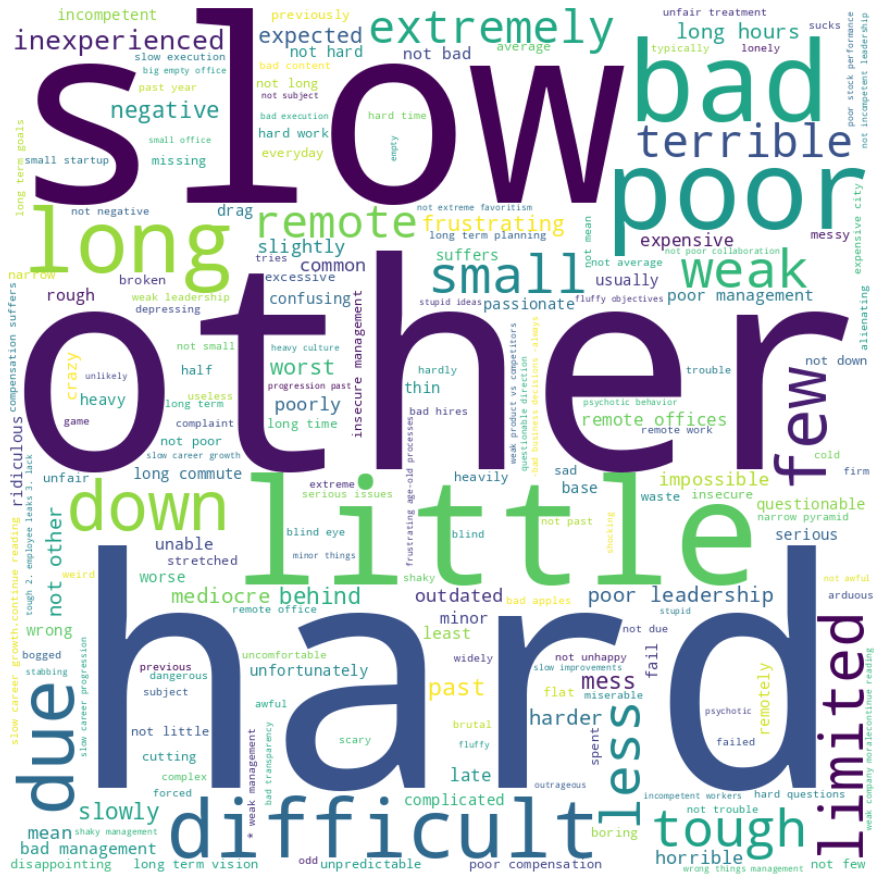

In [41]:
from wordcloud import WordCloud

# Create a WordCloud object with the specified parameters
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_words)

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
doc1_pros =" "
for comment in twitter_data_pre_layoff["Pros"]:
    doc1_pros = doc1_pros + str(comment)

Filtering out all the adjectives("JJ")

In [33]:
tokens = nltk.word_tokenize(doc1_pros)
tagged_tokens = nltk.pos_tag(tokens)
adjectives = [word for word, pos in tagged_tokens if pos.startswith("JJ")]
fdist = FreqDist(adjectives)
top_10_attributes = fdist.most_common(10)

In [ ]:
top_10_attributes

[('great', 312),
 ('good', 209),
 ('smart', 98),
 ('free', 71),
 ('nice', 65),
 ('best', 59),
 ('Good', 58),
 ('new', 52),
 ('open', 49),
 ('other', 46)]

Filtering out all the superlative adjectives ("JJS")

In [ ]:
tokens = nltk.word_tokenize(doc1_pros)
tagged_tokens = nltk.pos_tag(tokens)
adjectives = [word for word, pos in tagged_tokens if pos.startswith("JJS")]
fdist = FreqDist(adjectives)
top_10_attributes = fdist.most_common(10)

In [ ]:
top_10_attributes

[('biggest', 1), ('peoplebest', 1), ('best', 1), ('least', 1)]

In [ ]:
doc1_cons =" "
for comment in twitter_data_pre_layoff["Cons"]:
    doc1_cons = doc1_cons + str(comment)

In [ ]:
tokens = nltk.word_tokenize(doc1_cons)
tagged_tokens = nltk.pos_tag(tokens)
adjectives = [word for word, pos in tagged_tokens if pos.startswith("JJ")]
fdist = FreqDist(adjectives)
top_10_attributes = fdist.most_common(10)
top_10_attributes

[('many', 113),
 ('good', 76),
 ('other', 75),
 ('much', 68),
 ('more', 64),
 ('hard', 59),
 ('new', 54),
 ('great', 52),
 ('little', 49),
 ('bad', 43)]

## Post Layoffs


#  Positive comments (Pros) Post Layoffs

In [42]:
positive_words = twitter_data_post_layoff["Pros"].apply(get_positive_words)

In [43]:
flat_list = [word for sublist in positive_words for word in sublist]

In [44]:
from collections import Counter
word_counts = Counter(flat_list)
top_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200])
print(top_words)

{'great': 56, 'good': 35, 'amazing': 13, 'great culture': 8, 'smart': 8, 'great place': 8, 'really': 8, 'nice': 8, 'fun': 7, 'interesting': 7, 'great benefits': 6, 'great people': 5, 'strong': 5, 'supportive': 5, 'new': 5, 'good culture': 4, 'fast': 4, 'amazing place': 4, 'fantastic': 4, 'kind': 4, 'very': 4, 'cool': 3, 'smart people': 3, 'most': 3, 'best': 3, 'awesome': 3, 'good place': 3, 'friendly': 3, 'great perks': 3, 'willing': 2, 'high': 2, 'great management': 2, 'fun problems': 2, 'intelligent': 2, 'loved': 2, 'great work culture': 2, 'awesome culture': 2, 'first': 2, 'much': 2, 'incredible': 2, 'full': 2, 'interesting problems': 2, 'many': 2, 'excellent': 2, 'good benefits': 2, 'fantastic culture': 2, 'great wlb': 2, 'decent': 2, 'nice people': 2, 'wonderful': 2, 'cool work': 1, 'not great': 1, 'high compensation': 1, 'great work environment pre-acquisition': 1, 'great team': 1, 'great opportunity': 1, 'great office': 1, 'fun people': 1, 'strong intelligent partners': 1, 'supp

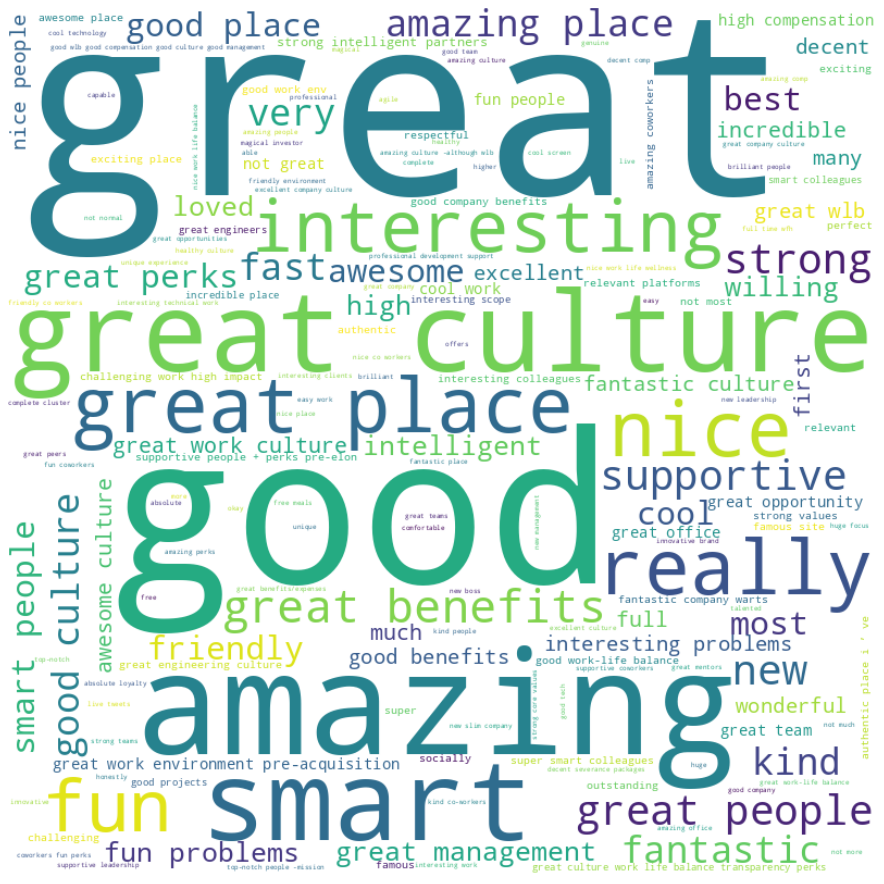

In [45]:
from wordcloud import WordCloud

# Create a WordCloud object with the specified parameters
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_words)

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Cons  Negative comments post layoffs

In [46]:
negative_words = twitter_data_pre_layoff["Cons"].apply(get_negative_words)

In [47]:
flat_list = [word for sublist in negative_words for word in sublist]
from collections import Counter
word_counts = Counter(flat_list)
top_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200])
print(top_words)

{'hard': 75, 'other': 70, 'slow': 66, 'little': 59, 'poor': 51, 'bad': 50, 'long': 50, 'difficult': 41, 'due': 37, 'down': 30, 'few': 30, 'limited': 22, 'less': 18, 'small': 17, 'weak': 17, 'tough': 16, 'extremely': 15, 'terrible': 15, 'remote': 15, 'inexperienced': 15, 'past': 12, 'behind': 11, 'negative': 11, 'mess': 11, 'slowly': 11, 'worst': 10, 'frustrating': 10, 'expected': 10, 'poor leadership': 9, 'long hours': 9, 'mediocre': 9, 'harder': 9, 'not other': 9, 'outdated': 7, 'impossible': 7, 'mean': 7, 'poorly': 7, 'slightly': 7, 'horrible': 7, 'common': 7, 'expensive': 6, 'late': 6, 'remote offices': 6, 'crazy': 5, 'minor': 5, 'bad management': 5, 'unable': 5, 'least': 5, 'rough': 5, 'not bad': 5, 'poor management': 5, 'unfortunately': 4, 'wrong': 4, 'thin': 4, 'heavy': 4, 'worse': 4, 'incompetent': 4, 'serious': 4, 'questionable': 4, 'not hard': 4, 'suffers': 4, 'confusing': 4, 'remotely': 4, 'ridiculous': 4, 'complicated': 4, 'drag': 4, 'fail': 4, 'long commute': 4, 'usually': 

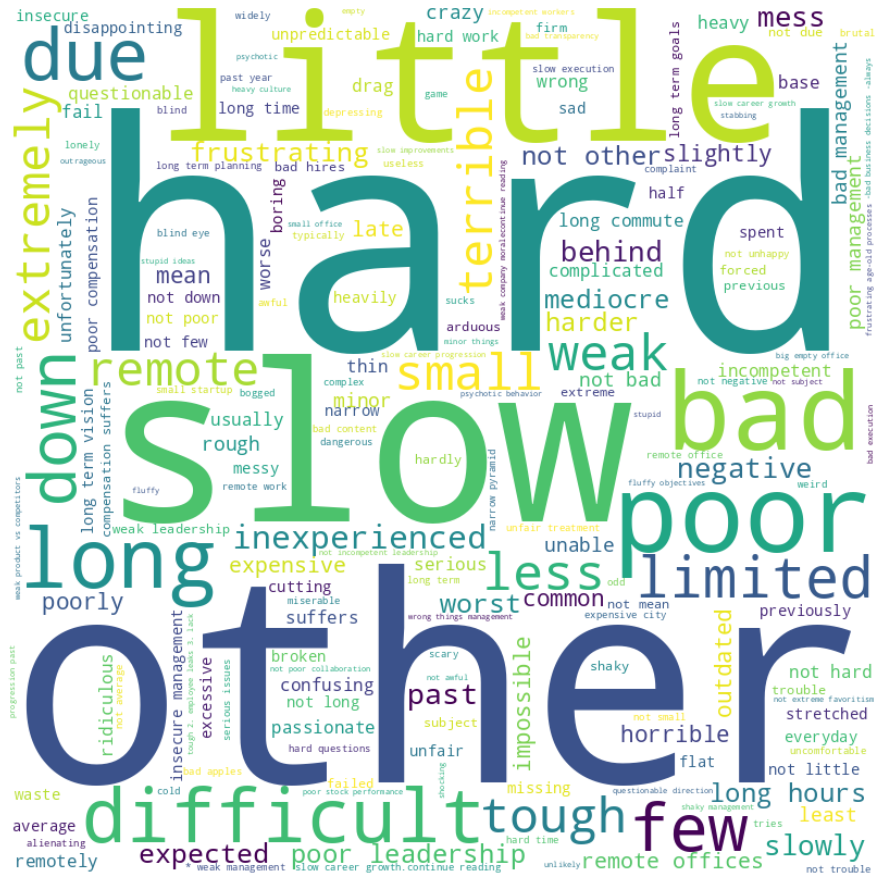

In [48]:
from wordcloud import WordCloud

# Create a WordCloud object with the specified parameters
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_words)

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
doc1_pros =" "
for comment in twitter_data_post_layoff["Pros"]:
    doc1_pros = doc1_pros+comment

In [ ]:
tokens = nltk.word_tokenize(doc1_pros)
tagged_tokens = nltk.pos_tag(tokens)
adjectives = [word for word, pos in tagged_tokens if pos.startswith("JJ")]
fdist = FreqDist(adjectives)
top_10_attributes = fdist.most_common(10)
top_10_attributes

[('great', 31),
 ('good', 19),
 ('amazing', 10),
 ('nice', 7),
 ('smart', 6),
 ('supportive', 5),
 ('work-life', 4),
 ('interesting', 4),
 ('new', 4),
 ('much', 3)]

In [ ]:
doc1_cons =" "
for comment in twitter_data_post_layoff["Cons"]:
    doc1_cons = doc1_cons+str(comment)

In [ ]:
tokens = nltk.word_tokenize(doc1_cons)
tagged_tokens = nltk.pos_tag(tokens)
adjectives = [word for word, pos in tagged_tokens if pos.startswith("JJ")]
fdist = FreqDist(adjectives)
top_10_attributes = fdist.most_common(10)

In [ ]:
top_10_attributes

[('new', 8),
 ('different', 6),
 ('poor', 5),
 ('slow', 4),
 ('chaotic', 4),
 ('best', 4),
 ('toxic', 4),
 ('terrible', 4),
 ('bad', 4),
 ('more', 3)]